# 回归
## 回归的多面性
![](http://ou8qjsj0m.bkt.clouddn.com//17-11-16/9905168.jpg)

### OLS回归的适用情境
OLS回归是通过预测变量的加权和来预测量化的因变量，其中权重是通过数据估计而得的参数。

## OLS回归
OLS回归拟合模型的形式：

$\hat{Y_i}=\hat{\beta}_0 + \hat{\beta}_1 X_{1i} + \cdots + \hat{\beta}_k X_{ki} \ i=1 \cdots n$

- n为观测的数目
- k为预测变量的数目
- $\hat{Y}_i$ 第i次观测对应的因变量的预测值（具体来讲，它是在已知预测变量的条件下，对Y分布估计的均值）
- $X_{ji}$ 第i次观测对应的第j个预测变量值

目标：通过减少响应变量的真实值与预测值的差值来获得模型参数（截距项和斜率）。

$\sum_{i=1}^n(Y_i-\hat{Y}_i)^2=\sum_{i=1}^n(Y_i-\hat{\beta}_0 + \hat{\beta_1}X_{1i} + \cdots + \hat{\beta}_kX_{ki})^2=\sum_{i=1}^n\epsilon_i^2$

为了能够恰当地解释OLS模型的系数，数据必须满足以下统计假设。

1. 正态性。对于固定的自变量值，因变量值成正态分布。
1. 独立性。$Y_i$值之间相互独立。
1. 线性。因变量与自变量之间为线性相关。
1. 同方差性。因变量的方差不随自变量的水平不同而变化。

### 用lm()拟合回归模型
```r
myfit <- lm(formula, data)
```

![](http://ou8qjsj0m.bkt.clouddn.com//17-11-16/80501866.jpg)

![](http://ou8qjsj0m.bkt.clouddn.com//17-11-16/28149952.jpg)

### 简单线性回归
代码清单8-1 简单线性回归

数据集women提供了15个年龄在30~39岁之间女性的身高和体重，我们通过身高来预测体重：

In [1]:
fit <- lm(weight ~ height, data=women)
summary(fit)


Call:
lm(formula = weight ~ height, data = women)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7333 -1.1333 -0.3833  0.7417  3.1167 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -87.51667    5.93694  -14.74 1.71e-09 ***
height        3.45000    0.09114   37.85 1.09e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.525 on 13 degrees of freedom
Multiple R-squared:  0.991,	Adjusted R-squared:  0.9903 
F-statistic:  1433 on 1 and 13 DF,  p-value: 1.091e-14


In [2]:
women$weight

[1] 115 117 120 123 126 129 132 135 139 142 146 150 154 159 164

In [3]:
fitted(fit)

1        2        3        4        5        6        7        8 
112.5833 116.0333 119.4833 122.9333 126.3833 129.8333 133.2833 136.7333 
       9       10       11       12       13       14       15 
140.1833 143.6333 147.0833 150.5333 153.9833 157.4333 160.8833

In [4]:
residuals(fit)

1           2           3           4           5           6 
 2.41666667  0.96666667  0.51666667  0.06666667 -0.38333333 -0.83333333 
          7           8           9          10          11          12 
-1.28333333 -1.73333333 -1.18333333 -1.63333333 -1.08333333 -0.53333333 
         13          14          15 
 0.01666667  1.56666667  3.11666667

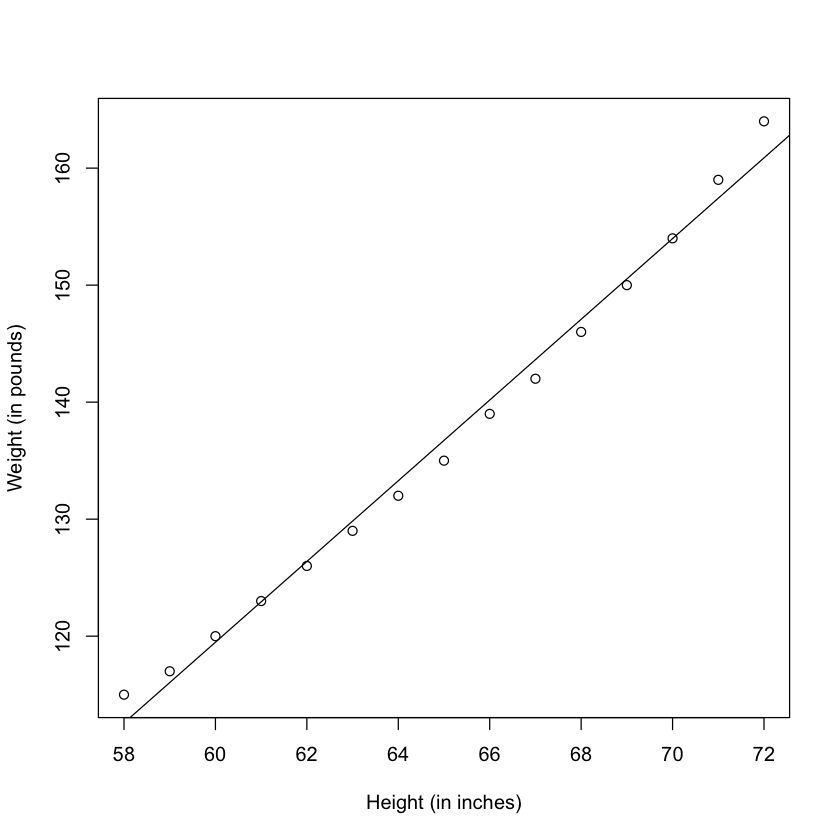

In [5]:
plot(women$height,women$weight,
     xlab="Height (in inches)",
     ylab="Weight (in pounds)")
abline(fit)

预测等式：

$\hat{Weight}=-87.52+3.45 \times Height$

1. 回归系数3.45显著不为0（p<0.001），表明身高每增高1英寸，体重将预期增加3.45磅。
1. R平方项（0.991）表明模型可以解释体重99.1%的方差，它也是实际和预测值之间相关系数的平方（$R^2=r^2_{\hat{Y}Y}$）。
1. 残差标准误（1.53 lbs）则可认为是模型用身高预测体重的平均误差。
1. F统计量检验所有的预测变量预测响应变量是否都在某个几率水平之上。由于简单回归只有一个预测变量，此处F检验等同于身高回归系数的t检验。

### 多项式回归
```r
fit2 <- lm(weight ~ height + I(height^2), data=women)
```

代码清单8-2 多项式回归

In [6]:
fit2 <- lm(weight ~ height + I(height^2), data=women)
summary(fit2)


Call:
lm(formula = weight ~ height + I(height^2), data = women)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.50941 -0.29611 -0.00941  0.28615  0.59706 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 261.87818   25.19677  10.393 2.36e-07 ***
height       -7.34832    0.77769  -9.449 6.58e-07 ***
I(height^2)   0.08306    0.00598  13.891 9.32e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3841 on 12 degrees of freedom
Multiple R-squared:  0.9995,	Adjusted R-squared:  0.9994 
F-statistic: 1.139e+04 on 2 and 12 DF,  p-value: < 2.2e-16


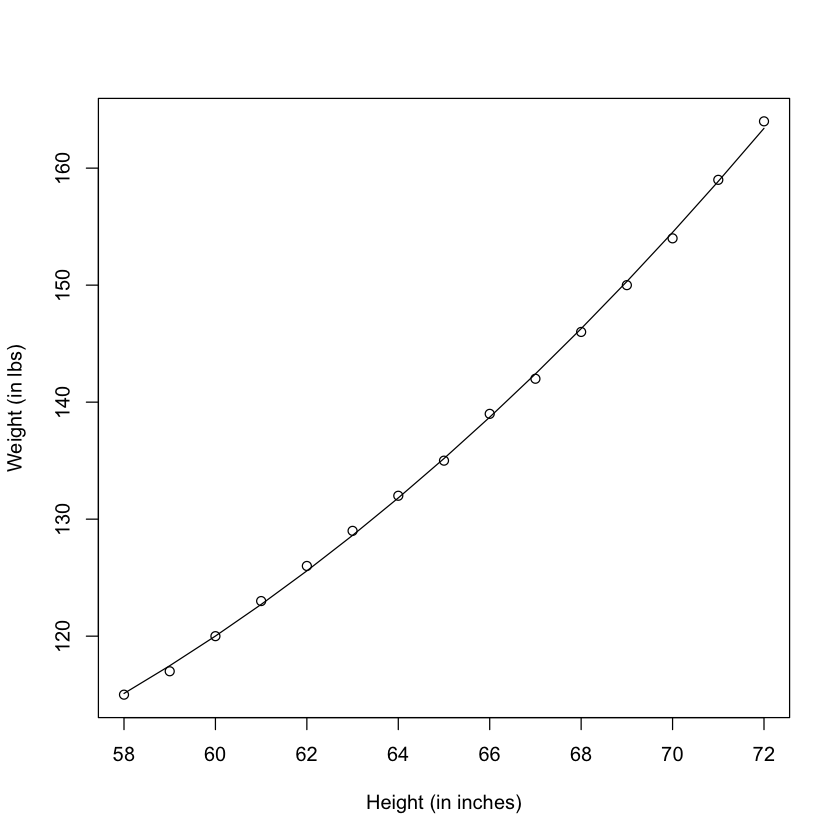

In [8]:
plot(women$height,women$weight,
     xlab="Height (in inches)",
     ylab="Weight (in lbs)")
lines(women$height,fitted(fit2))

新的预测等式为：

$\hat{Weight}=261.88-7.35 \times Height + 0.083 \times {Height}^2$

1. 在p<0.001水平下，回归系数都非常显著。
1. 模型的方差解释率已经增加到99.9%。
1. 二次项的显著性（t=13.89，p<0.001）表明包含二次项提高了模型的拟合度。

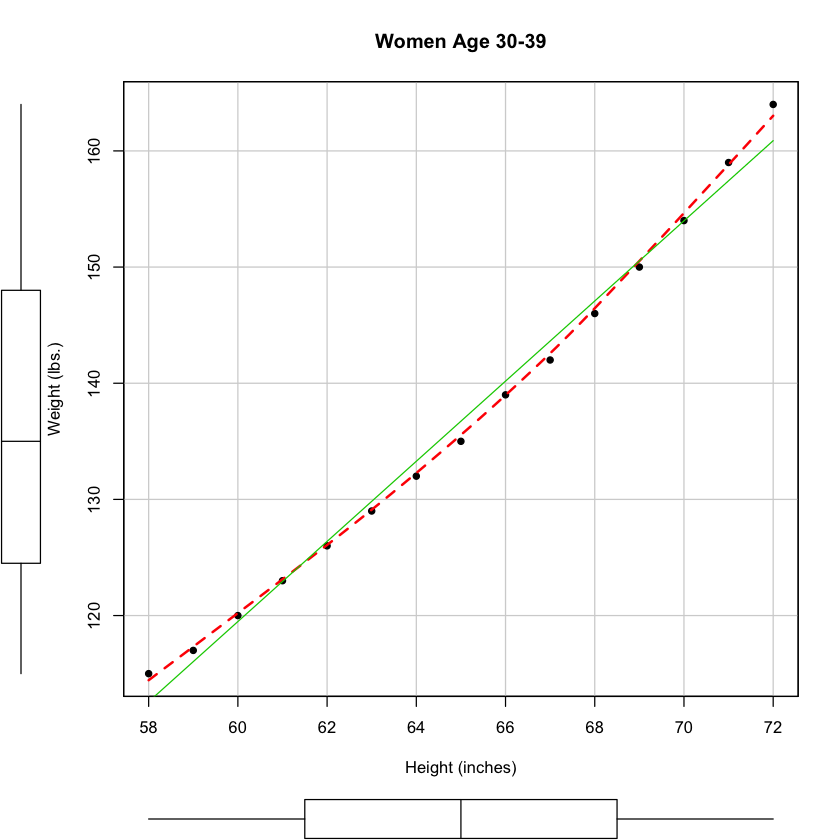

In [11]:
library(car)
scatterplot(weight ~ height, data=women,
            spread=FALSE, # 删除了残差正负均方根在平滑曲线上的展开和非对称信息
            smoother.args=list(lty=2), # 设置平滑拟合（loess）拟合曲线为虚线
            pch=19, # 设置点为实心圆（默认为空心圆）
            main="Women Age 30-39",
            xlab="Height (inches)",
            ylab="Weight (lbs.)")

### 多元线性回归
多元回归分析中，第一步最好检查一下变量间的相关性。cor()函数提供了二变量之间的相关系数，car包中scatterplotMatrix()函数则会生成散点矩阵。

代码清单8-3 检测二变量关系

In [12]:
states <- as.data.frame(state.x77[,c("Murder", "Population",
                                     "Illiteracy", "Income", "Frost")])
cor(states)

,Murder,Population,Illiteracy,Income,Frost
Murder,1.0000000,0.3436428,0.7029752,-0.2300776,-0.5388834
Population,0.3436428,1.0000000,0.1076224,0.2082276,-0.3321525
Illiteracy,0.7029752,0.1076224,1.0000000,-0.4370752,-0.6719470
Income,-0.2300776,0.2082276,-0.4370752,1.0000000,0.2262822
Frost,-0.5388834,-0.3321525,-0.6719470,0.2262822,1.0000000


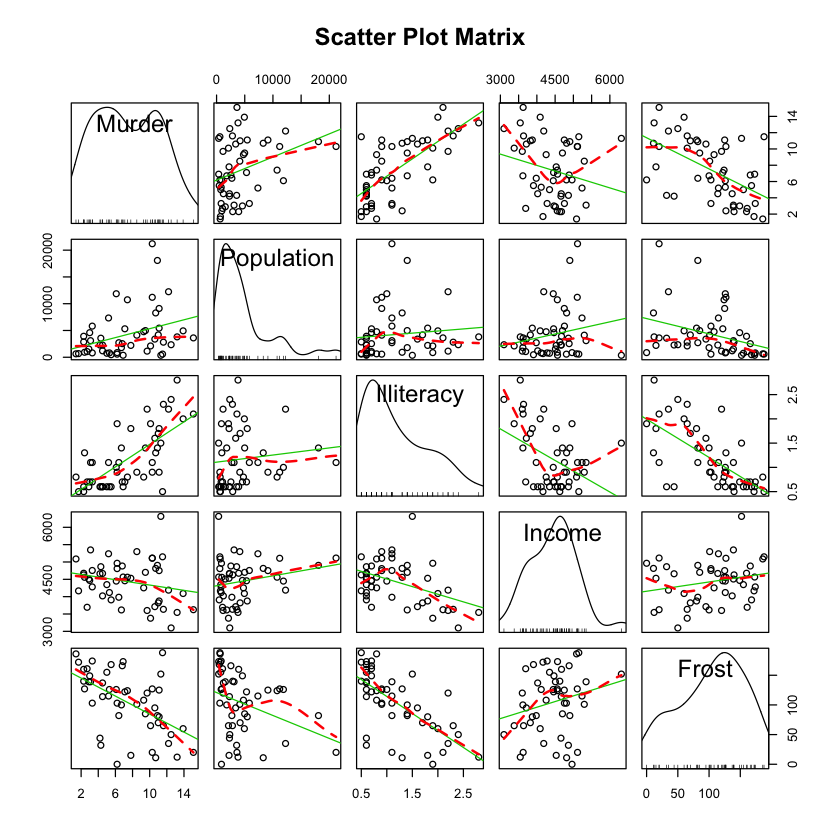

In [13]:
library(car)
scatterplotMatrix(states, spread=FALSE, smoother.args=list(lty=2),
                  main="Scatter Plot Matrix")

包含线性和平滑拟合曲线，以及相应的边际分布（核密度图和轴须图）。从图中可以看到

1. 谋杀率是双峰的曲线，每个预测变量都一定程度上出现了偏斜。
1. 谋杀率随着人口和文盲率的增加而增加，随着收入水平和结霜天数增加而下降。
1. 越冷的州府文盲率越低，收入水平越高。

代码清单8-4 多元线性回归

In [15]:
states <- as.data.frame(state.x77[,c("Murder", "Population", "Illiteracy", "Income", "Frost")])
fit <- lm(Murder ~ Population + Illiteracy + Income + Frost, data=states)
summary(fit)


Call:
lm(formula = Murder ~ Population + Illiteracy + Income + Frost, 
    data = states)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7960 -1.6495 -0.0811  1.4815  7.6210 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.235e+00  3.866e+00   0.319   0.7510    
Population  2.237e-04  9.052e-05   2.471   0.0173 *  
Illiteracy  4.143e+00  8.744e-01   4.738 2.19e-05 ***
Income      6.442e-05  6.837e-04   0.094   0.9253    
Frost       5.813e-04  1.005e-02   0.058   0.9541    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.535 on 45 degrees of freedom
Multiple R-squared:  0.567,	Adjusted R-squared:  0.5285 
F-statistic: 14.73 on 4 and 45 DF,  p-value: 9.133e-08


当预测变量不止一个时，回归系数的含义为：一个预测变量增加一个单位，其他预测变量保持不变时，因变量将要增加的数量。本例中，文盲率的回归系数为4.14，表示控制人口、收入和温度不变时，文盲率上升1%，谋杀率会上升4.14%，它的系数在p<0.001的水平下显著不为0。相反，Frost的系数没有显著不为0（p=0.954），表明当控制其他变量不变时，Frost与Murder不呈线性关系。

总体来看，所有的预测变量解释了各州谋杀率57%的方差。

以上分析没有考虑预测变量的交互项。

### 有交互项的多元线性回归
代码清单8-5 有显著交互项的多元线性回归

In [16]:
fit <- lm(mpg ~ hp + wt + hp:wt, data=mtcars)
summary(fit)


Call:
lm(formula = mpg ~ hp + wt + hp:wt, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0632 -1.6491 -0.7362  1.4211  4.5513 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 49.80842    3.60516  13.816 5.01e-14 ***
hp          -0.12010    0.02470  -4.863 4.04e-05 ***
wt          -8.21662    1.26971  -6.471 5.20e-07 ***
hp:wt        0.02785    0.00742   3.753 0.000811 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.153 on 28 degrees of freedom
Multiple R-squared:  0.8848,	Adjusted R-squared:  0.8724 
F-statistic: 71.66 on 3 and 28 DF,  p-value: 2.981e-13


观察Pr(>|t|)栏中，马力与车重的交互项是显著的。若两个预测变量的交互项显著，说明响应变量与其中一个预测变量的关系依赖于另外一个预测变量的水平。因此此例说明，每加仑汽油行驶英里数与汽车马力的关系依车重不同而不同。

预测mpg的模型为：

$\hat{mpg}=49.81-0.12 \times hp - 8.22 \times wt + 0.03 \times hp \times wt$

通货effects包中的effect()函数，你可以用图形展示交互项的结果：

```r
plot(effect(term, mod,, xlevels), multiline=TRUE)
```

- term 模型要画的项
- mod 通过lm()拟合的模型
- xlevels 是一个列表，指定变量要设定的常量值
- multiline=TRUE选项表示添加相应直线

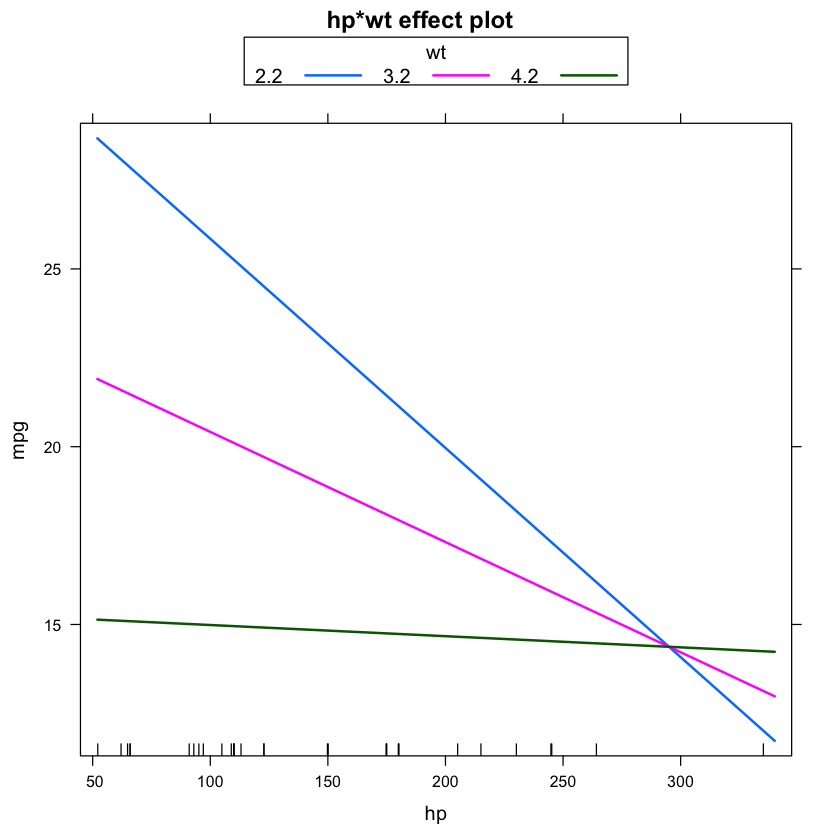

In [18]:
library(effects)
plot(effect("hp:wt", fit,, list(wt=c(2.2,3.2,4.2))), multiline=TRUE)

随着车重增加（2.2，3.2，4.2），hp每增加一个单位引起的mpg预期改变却在减少 （0.06，0.03，0.003）。

从图中可以看出，随着车重的增加，马力与每加仑汽油行驶英里数的关系减弱了。当wt=4.2时，直线几乎是水平的，表明随着hp的增加，mpg不会发生改变。

## 回归诊断

In [19]:
states <- as.data.frame(state.x77[,c("Murder", "Population", "Illiteracy", "Income", "Frost")])
fit <- lm(Murder ~ Population + Illiteracy + Income + Frost, data=states)
confint(fit)

,2.5 %,97.5 %
(Intercept),-6.552191e+00,9.0213182149
Population,4.136397e-05,0.0004059867
Illiteracy,2.381799e+00,5.9038743192
Income,-1.312611e-03,0.0014414600
Frost,-1.966781e-02,0.0208304170


结果表明

1. 文盲率改变1%，谋杀率就在95%的置信区间[2.38,5.90]中变化。
1. 因为Frost的置信区间包含0，所以得出结论：当其他变量不变时，温度的改变与谋杀率无关。

### 标准方法

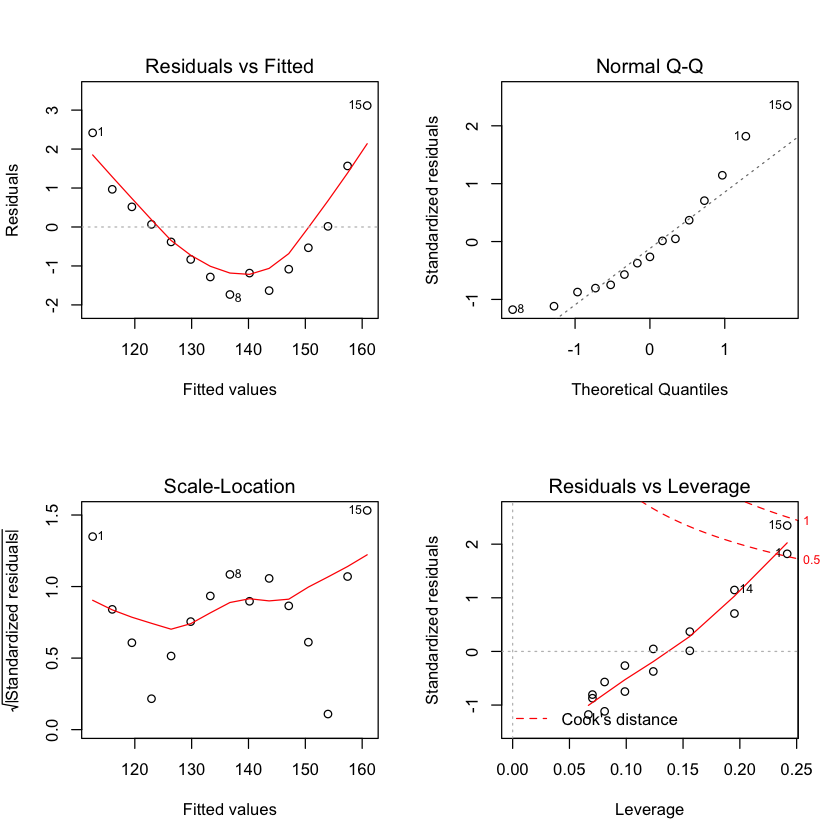

In [20]:
fit <- lm(weight ~ height, data=women)
par(mfrow=c(2,2))
plot(fit)

OLS回归的统计假设。

1. `正态性`。当预测变量值固定时，因变量成正态分布，则残差值也应该是一个均值为0的正态分布。`“正态Q-Q图”`（Normal Q-Q，右上）是在正态分布对应的值下，标准化残差的概率图。若满足正态假设，那么图上的点应该落在呈45度角的直线上；若不是如此，那么就违反了正态性假设。
1. `独立性`。你无法从这些图中分辨出因变量值是否相互独立，只能从收集的数据中来验证。上面例子中，没有任何先验的理由去相信一位女性的体重会影响另外一位女性的体重。假设你发现数据是从一个家庭抽样得来的，那么可能必须要调整独立性的假设。
1. `线性`。若因变量与自变量线性相关，那么残差值与预测（拟合）值就没有任何系统关联。换句话说，除了白噪声，模型应该包含数据中所有的系统方差。在“残差图与拟合图”（Residuals vs Fitted，左上）中可以清楚地看到一个曲线关系，这暗示着你可能需要对回归模型加上一个二次项。
1. `同方差性`。若满足不变方差假设，那么在“位置尺度图”（Scale-Location Graph，左下）中，水平线周围的点应该随机分布。该图似乎满足此假设。

“残差与杠杆图”（Residuals vs Leverage，右下）提供你可能关注的单个观测点的信息。从图形可以鉴别出离群点、高杠杆点和强影响点。

1. 一个观测点是`离群点`，表明拟合回归模型对其预测效果不佳（产生了巨大的或正或负的残差）。
1. 一个观测点有很`高的杠杆值`，表明它是一个异常的预测变量值的组合。也就是说，在预测变量空间中，它是一个离群点。因变量值不参与计算一个观测点的杠杆值。
1. 一个观测点是`强影响点`（influential observation）。表明它对模型参数的估计产生的影响过大，非常不成比例。强影响点可以通过Cook距离即Cook's D统计量来鉴别。

再看看二次拟合的诊断图：

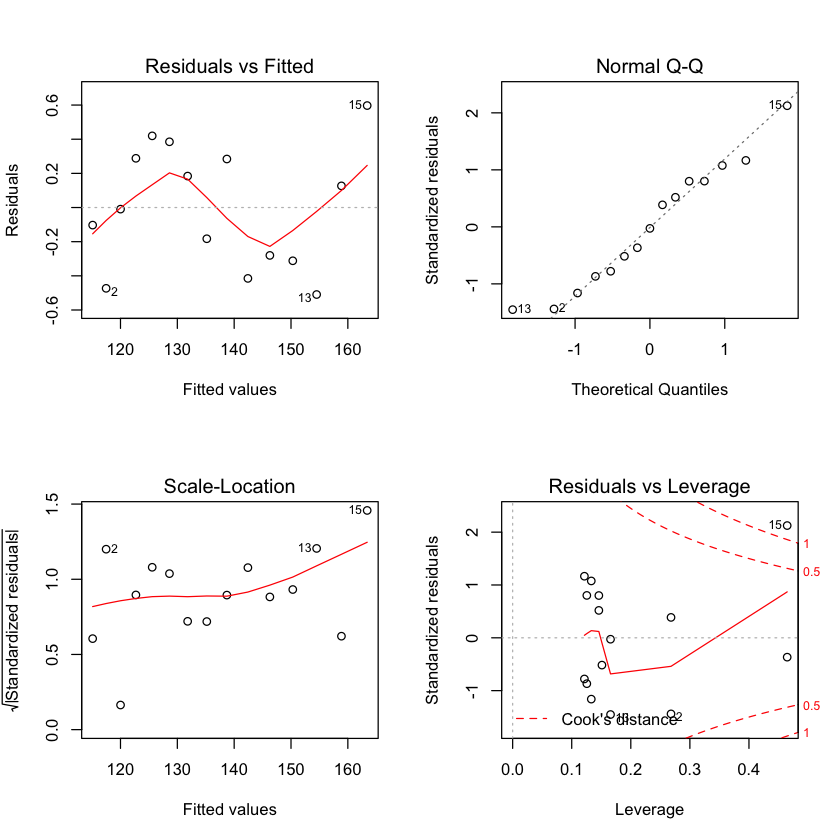

In [21]:
fit2 <- lm(weight ~ height + I(height^2), data=women)
par(mfrow=c(2,2))
plot(fit2)

这一组图表明多项式回归拟合效果比较理想，基本符合了线性假设、残差正态性（除了观测点13）和同方差性（残差方差不变）。观测点15看起来像是强影响点（根据它有较大的Cook距离值），产出它将会影响参数的估计。事实上，删除观测点13和15，模型会拟合更好。

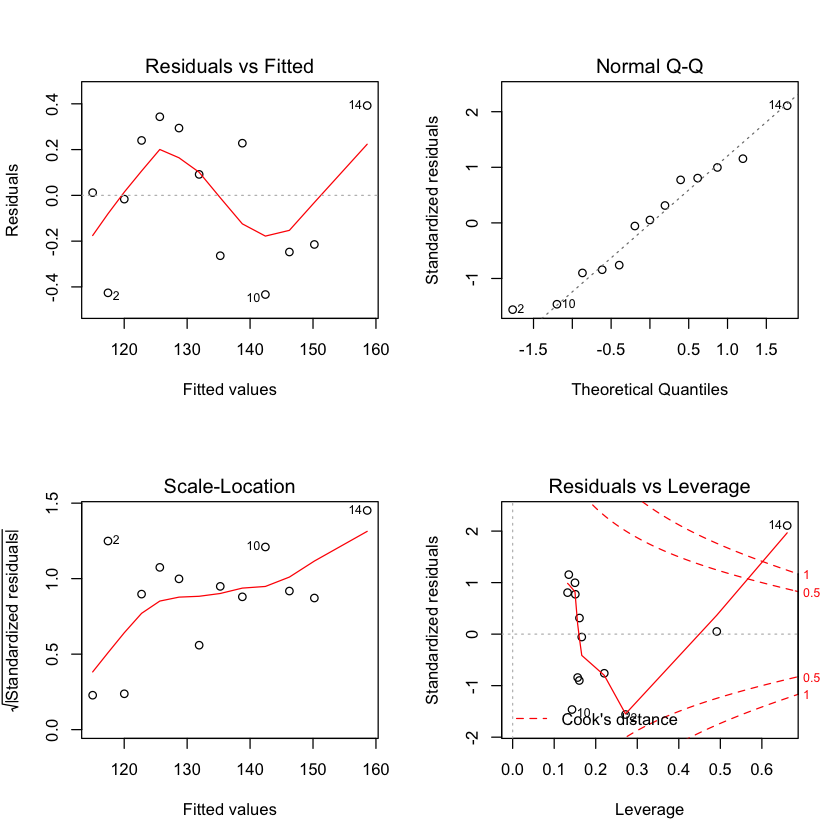

In [22]:
newfit <- lm(weight~ height + I(height^2), data=women[-c(13,15),])
par(mfrow=c(2,2))
plot(newfit)

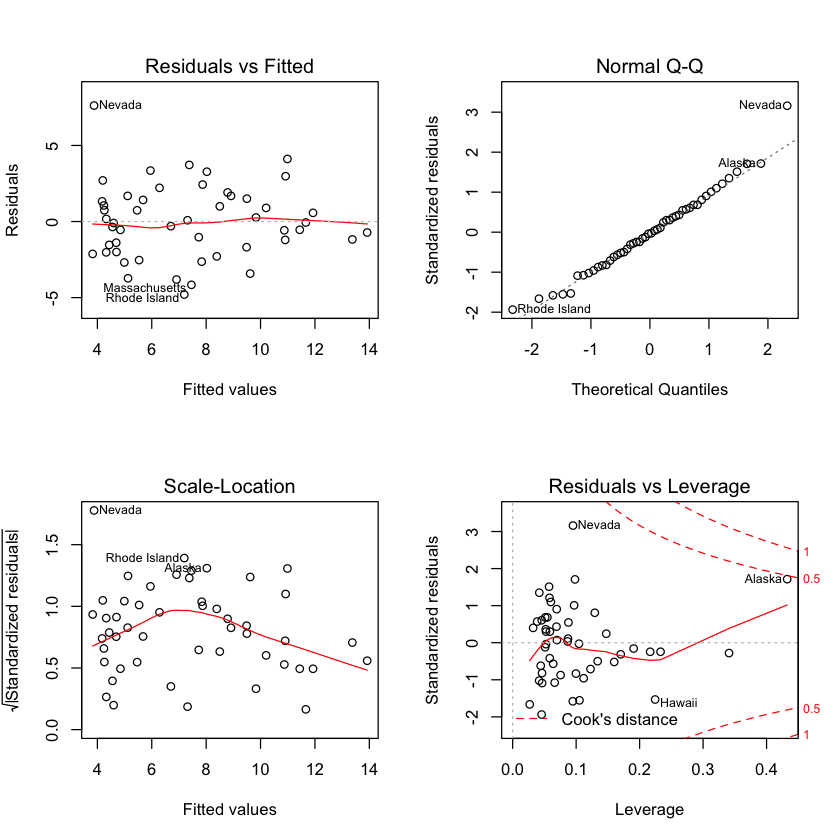

In [23]:
states <- as.data.frame(state.x77[,c("Murder", "Population", "Illiteracy", "Income", "Frost")])
fit <- lm(Murder ~ Population + Illiteracy + Income + Frost, data=states)
par(mfrow=c(2,2))
plot(fit)

除去Nevada一个离群点，模型假设得到了很好的满足。

### 改进的方法
表8-4 (car包中的)回归诊断实用函数

| 函数 | 目的 |
| --- | --- |
| qqPlot() | 分位数比较图 |
| durbinWatsonTest() | 对误差自相关做Durbin-Watson检验 |
| crPlots() | 成分与残差图 |
| ncvTest() | 对非恒定的误差方差做得分检验 |
| spreadLevelPlot() | 分散水平检验 |
| outlierTest() | Bonferroni离群点检验 |
| avPlots() | 添加的变量图形 |
| inluencePlot() | 回归影响图 |
| scatterplot() | 增强的散点图 |
| scatterplotMatrix() | 增强的散点图矩阵 |
| vif() | 方差膨胀因子 |

#### 1.正态性

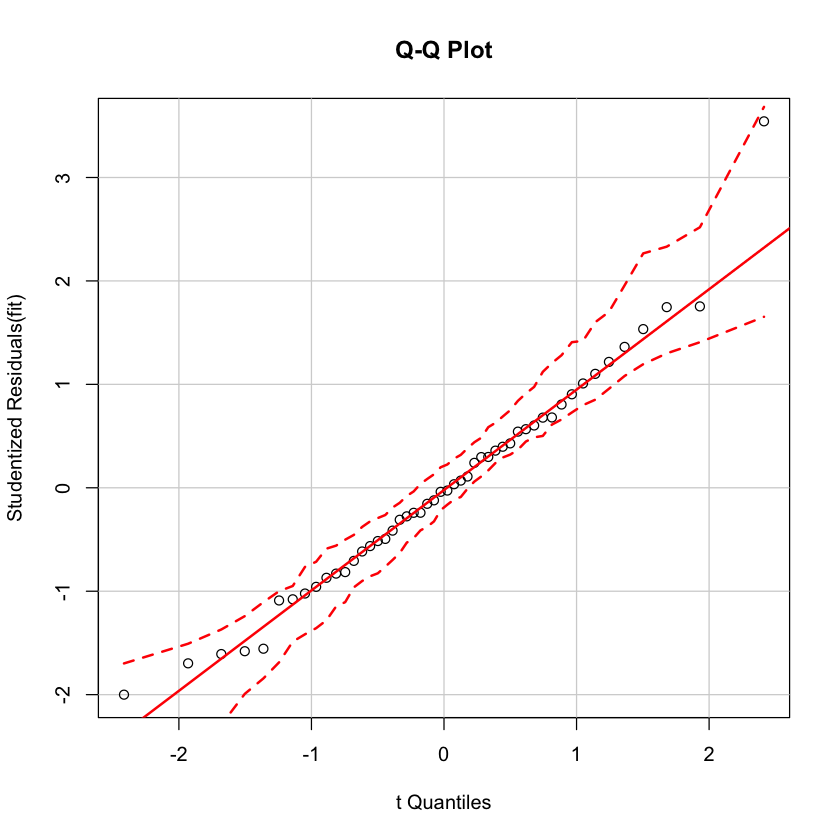

In [1]:
library(car)
states <- as.data.frame(state.x77[,c("Murder", "Population", "Illiteracy", "Income", "Frost")])
fit <- lm(Murder ~ Population + Illiteracy + Income + Frost, data=states)
qqPlot(fit, labels=row.names(states), id.method="identify", simulate=TRUE, main="Q-Q Plot")

除了Nevada，所有的点都离直线很近，并都落在置信区间内，这表明正态性假设符合得很好。但是Nevada有一个很大的正残差值（真实值-预测值），表明模型低估了该州的谋杀率。

In [2]:
states["Nevada",]

,Murder,Population,Illiteracy,Income,Frost
Nevada,11.5,590,0.5,5149,188


In [3]:
fitted(fit)["Nevada"]

Nevada 
3.878958

In [4]:
residuals(fit)["Nevada"]

Nevada 
7.621042

In [5]:
rstudent(fit)["Nevada"]

Nevada 
3.542929

Nevada的谋杀率是11.5%，而模型预测的谋杀率为3.9%。

代码清单8-6 绘制学生化残差图的函数

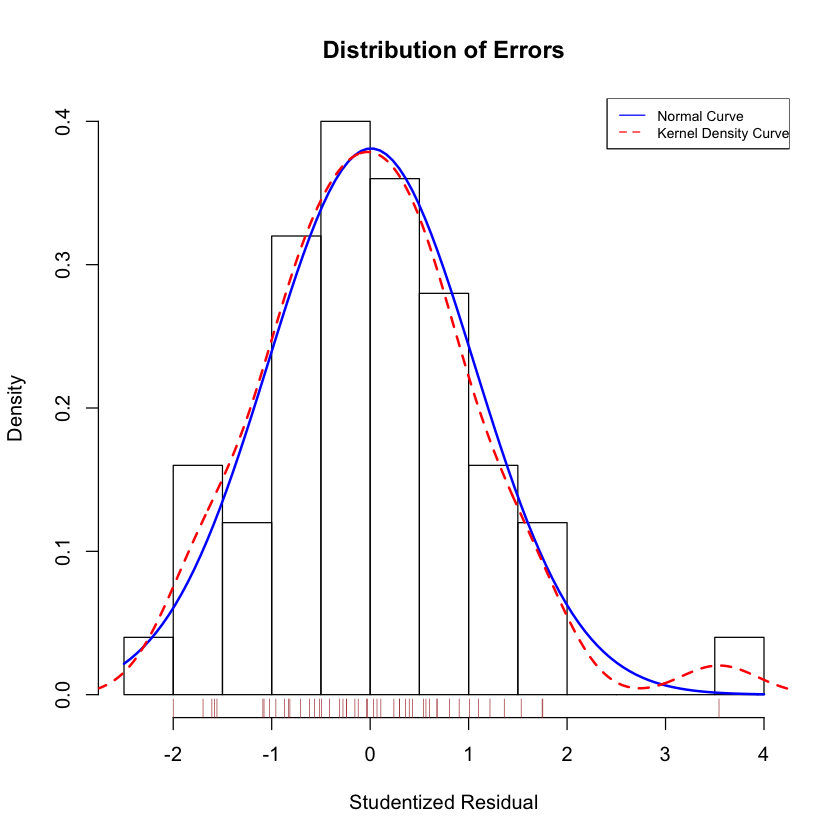

In [6]:
residplot <- function(fit, nbreaks=10) {
    z <- rstudent(fit)
    hist(z, breaks=nbreaks, freq=FALSE,
         xlab="Studentized Residual",
         main="Distribution of Errors")
    rug(jitter(z), col="brown")
    curve(dnorm(x, mean=mean(z), sd=sd(z)),
          add=TRUE, col="blue", lwd=2)
    lines(density(z)$x, density(z)$y,
          col="red", lwd=2, lty=2)
    legend("topright",
       legend = c( "Normal Curve", "Kernel Density Curve"),
       lty=1:2, col=c("blue","red"), cex=.7)
    }
residplot(fit)

如图除了一个很明显的离群点，误差很好地服从了正态分布。

#### 2. 误差的独立性
判断因变量值（或残差）是否相互独立，最好的方法是依据收集数据方式的先验知识。car包提供了一个可做Durbin-Watson检验的函数，能够检测误差的序列相关性。在多元回归中，使用下面的代码可以做Durbin-Watson检验：

In [7]:
durbinWatsonTest(fit)

 lag Autocorrelation D-W Statistic p-value
   1      -0.2006929      2.317691   0.278
 Alternative hypothesis: rho != 0

p值不显著（p=0.282）说明无自相关性，误差项之间独立。滞后项（lag=1）表明数据集中每个数据都是与其后一个数据进行比较的。

#### 3.线性
通过成分残差图（component plus residual plot）也称偏残差图（partial residual plot），可以看看因变量与自变量之间是否呈非线性关系。

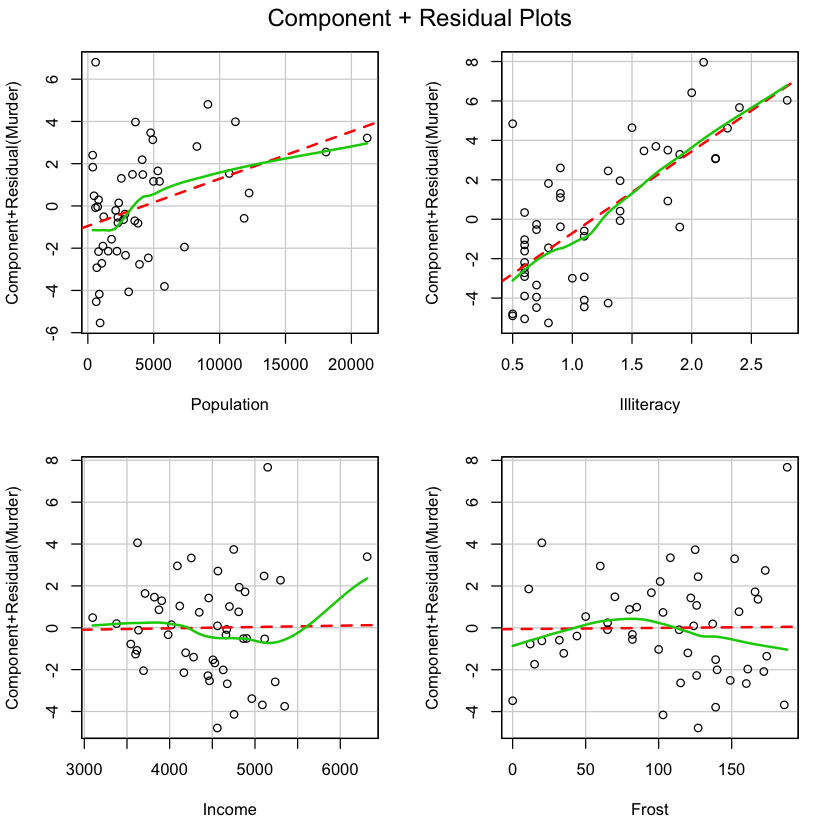

In [8]:
library(car)
crPlots(fit)

创建变量X的成分残差图，需要绘制点$\epsilon_i+(\hat{\beta_0}+\hat{\beta_1}X_{1i}+\cdots+\hat{\beta_k}X_{ki})\ vs X_i$。其中残差项$\epsilon_i$是基于所有模型的，i=1,...,n。每幅图都会给出$(\hat{\beta_0}+\hat{\beta_1}X_{1i}+\cdots+\hat{\beta_k}X_{ki})\ vs X_i$的直线。

若图形存在非线性，则说明你可能对预测变量的函数形式建模不够充分，那么就需要添加一些曲线成分，比如多项式项，或对一个或多个变量进行变换（如log(x)代替x），或用其他回归变体形式而不是线性回归。

从上图可以看出，成分残差证实了线性假设，线性模型形式对该数据集看似是合适的。

#### 4.同方差性
car包提供两个函数，可以判断误差方差是否恒定。ncvTest()函数生成一个计分检验，零假设为误差方差不变，备选假设为误差方差随着拟合值水平的变化而变化。若检验显著，则说明存在异方差性（误差方差不恒定）。

spreadLevelPlot()函数创建一个添加了最佳拟合曲线的散点图，展示标准化残差绝对值与拟合值的关系。

代码清单8-7 检验同方差性

In [9]:
library(car)
ncvTest(fit)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 1.746514    Df = 1     p = 0.1863156 

可以看到，计分检验不显著（p=0.19）说明满足方差不变假设。


Suggested power transformation:  1.209626 

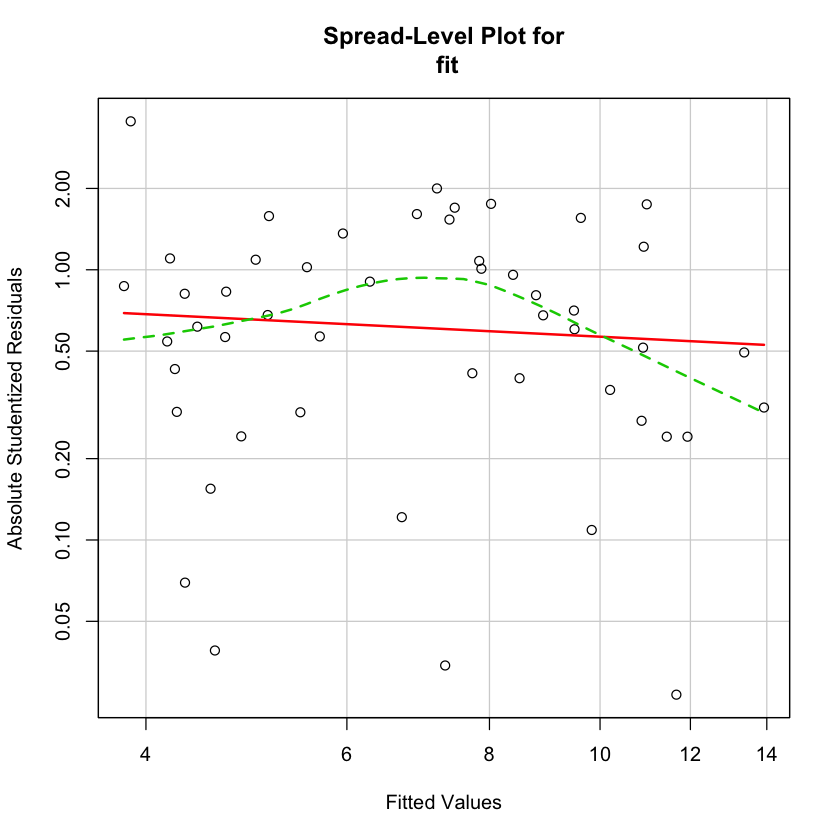

In [10]:
spreadLevelPlot(fit)

上图中的点在水平的最佳拟合曲线周围呈水平随机分布。若违反了该假设，你将会看到一个非水平的曲线。代码结果建议幂次变换的含义是，经过p次幂（$Y^p$）变换，非恒定的误差方差将会平稳。例如，若图形显示出了非水平趋势，建议幂次转换为0.5，在回归等式中用$\sqrt{Y}$代替Y，可能会使模型满足同方差性。若建议幂次为0，则使用对数变换。对于当前例子，异方差性很不明显，因此建议幂次接近1（不需要进行变换）。

### 线性模型假设的综合验证
代码清单8-8 线性模型假设的综合检验

In [11]:
library(gvlma)
gvmodel <- gvlma(fit)
summary(gvmodel)


Call:
lm(formula = Murder ~ Population + Illiteracy + Income + Frost, 
    data = states)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7960 -1.6495 -0.0811  1.4815  7.6210 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.235e+00  3.866e+00   0.319   0.7510    
Population  2.237e-04  9.052e-05   2.471   0.0173 *  
Illiteracy  4.143e+00  8.744e-01   4.738 2.19e-05 ***
Income      6.442e-05  6.837e-04   0.094   0.9253    
Frost       5.813e-04  1.005e-02   0.058   0.9541    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.535 on 45 degrees of freedom
Multiple R-squared:  0.567,	Adjusted R-squared:  0.5285 
F-statistic: 14.73 on 4 and 45 DF,  p-value: 9.133e-08


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = fit) 

                    Value p-value                Decision
Global Stat        2.7728  0.5965 

从Global Stat栏可以看到数据满足OLS回归模型所有的统计假设（p=0.597）。若p<0.05，可以使用前几节讨论的方法来判断哪些假设没有被满足。